https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

In [3]:
df1 = pd.read_csv("bengaluru_house_prices.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
df2 = df1[['location','size','total_sqft','bath','balcony','price']]
df2.head(3)

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00


**Handle NA values**

In [7]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [8]:
df2.total_sqft.isnull().sum()

0

In [9]:
df3 = df2[(df2['size'].notnull() & df2['location'].notnull())]
df3.isnull().sum()

location        0
size            0
total_sqft      0
bath           57
balcony       593
price           0
dtype: int64

In [10]:
df3.bath.unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [11]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.bhk.unique()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [12]:
type(df3.total_sqft[0])

str

In [13]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [14]:
df3[~df3['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,NaN,NaN,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,NaN,NaN,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2


In [15]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [16]:
df3.total_sqft = df3.total_sqft.apply(convert_sqft_to_num)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [17]:
df3[df3.total_sqft.isnull()]

,location,size,total_sqft,bath,balcony,price,bhk
410,Kengeri,1 BHK,NaN,1.0,0.0,18.50,1
648,Arekere,9 Bedroom,NaN,9.0,NaN,265.00,9
775,Basavanagara,1 BHK,NaN,2.0,1.0,93.00,1
872,Singapura Village,2 BHK,NaN,2.0,NaN,45.00,2
1019,Marathi Layout,1 Bedroom,NaN,1.0,0.0,110.00,1
1086,Narasapura,2 Bedroom,NaN,2.0,2.0,29.50,2
1400,Chamrajpet,9 BHK,NaN,9.0,1.0,296.00,9
1712,Singena Agrahara,3 Bedroom,NaN,3.0,1.0,95.00,3
1743,Hosa Road,3 BHK,NaN,3.0,1.0,115.00,3
1821,Sarjapur,3 Bedroom,NaN,3.0,1.0,76.00,3


In [18]:
df4 = df3[~(df3.total_sqft.isnull())]
df4.total_sqft.isnull().sum()

0

<h2 style="color:purple">Clean up data using price per square feet</h2>

**Find out price per square feet**

In [19]:
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']
df4.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [20]:
df4['price_per_sqft'].describe()

count    1.325700e+04
mean     7.912825e+03
std      1.064976e+05
min      2.678298e+02
25%      4.271186e+03
50%      5.438596e+03
75%      7.313318e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [21]:
max_price_per_sqft = int(max(df4['price_per_sqft']))
b = range(0,max_price_per_sqft,10000)

(array([11439.,  1544.,   225., ...,     0.,     0.,     0.]),
 array([       0,    10000,    20000, ..., 11970000, 11980000, 11990000]),
 <a list of 1199 Patch objects>)

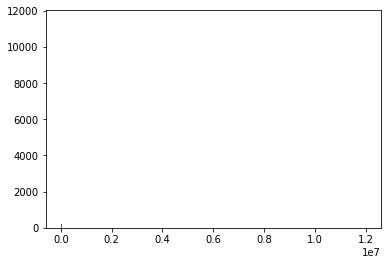

In [22]:
plt.hist(df4.price_per_sqft,bins=b)

**Use log scale for better viewing of the chart**

(array([11439.,  1544.,   225., ...,     0.,     0.,     0.]),
 array([       0,    10000,    20000, ..., 11970000, 11980000, 11990000]),
 <a list of 1199 Patch objects>)

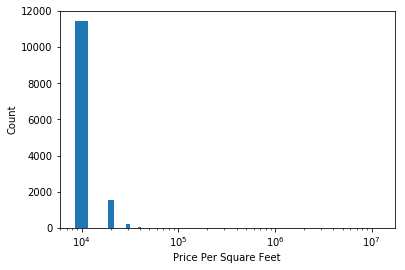

In [23]:
plt.xscale('log')
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')
plt.hist(df4.price_per_sqft,bins=b, rwidth=0.3,align='right')

**Based on above chart it looks like we should exclude anything that has price_per_sqft > 10000. But before excluding them
let's eyeball those data points that are going to be excluded**

In [24]:
df4[df4.price_per_sqft>10000].head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,NaN,600.0,4,18181.818182
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,NaN,370.0,6,36274.509804
11,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.0,4,10592.459605
18,Ramakrishnappa Layout,3 BHK,2770.0,4.0,2.0,290.0,3,10469.314079
22,Thanisandra,4 Bedroom,2800.0,5.0,2.0,380.0,4,13571.428571


**As a data scientist you will give this report to your business manager for verification. Business manager might say that 4 BHK flat in Rajaji nagar with 6 crore price seems ok and should not be removed. Now you change your criteria further to exclude properties with price_per_sqft < 20000**

In [25]:
df4[df4.price_per_sqft>20000].head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,NaN,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,NaN,200.0,8,33333.333333
89,Rajaji Nagar,6 Bedroom,710.0,6.0,3.0,160.0,6,22535.211268
159,Mahalakshmi Layout,4 Bedroom,3750.0,4.0,0.0,760.0,4,20266.666667
192,Bellandur,4 Bedroom,1200.0,5.0,NaN,325.0,4,27083.333333


(array([   9.,   21.,  496., 1955., 2935., 2519., 1636., 1003.,  556.,
         309.,  346.,  224.,  212.,  176.,  132.,  150.,  120.,   71.,
          71.]),
 array([    0,  1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,
         9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000,
        18000, 19000]),
 <a list of 19 Patch objects>)

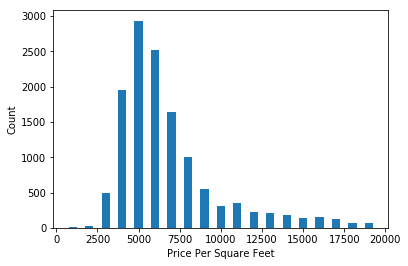

In [26]:
df5 = df4[~(df4.price_per_sqft>20000)]
max_price_per_sqft = int(max(df5['price_per_sqft']))
b = range(0,max_price_per_sqft,1000)

plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')
plt.hist(df5.price_per_sqft,bins=b, rwidth=0.5,align='right')

**Your business manager tells you that on the lower side, anything less than 2000 rs per square ft looks suspicious. He asks you to give report of such properties and you generate it as show below**

In [27]:
df5[df5.price_per_sqft<2000].head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
132,Electronic City,2 BHK,880.0,1.0,1.0,16.5,2,1875.000000
514,Banashankari Stage III,4 Bedroom,8500.0,4.0,2.0,145.0,4,1705.882353
674,Yelahanka,3 BHK,35000.0,3.0,3.0,130.0,3,371.428571
810,4 Bedroom Farm House in Bagalur,4 Bedroom,10961.0,4.0,1.0,80.0,4,729.860414
996,Chikkabanavar,1 Bedroom,1200.0,1.0,0.0,20.0,1,1666.666667


In [28]:
df6 = df5[~(df5.price_per_sqft<2000)]
df6.shape

(12991, 8)

<h2 style="color:purple">Lets check BHK feature now</h2>

(array([0.000e+00, 6.270e+02, 5.504e+03, 4.811e+03, 1.307e+03, 3.160e+02,
        1.960e+02, 9.200e+01, 7.400e+01, 4.300e+01, 1.100e+01, 4.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 26 Patch objects>)

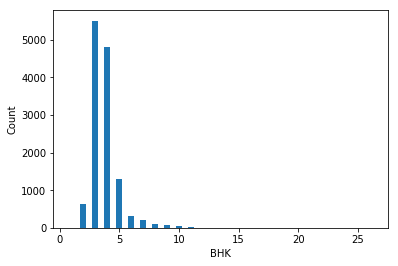

In [29]:
plt.xlabel('BHK')
plt.ylabel('Count')
plt.hist(df6.bhk,bins=range(0,max(df6.bhk)), rwidth=0.5, align='right')

In [30]:
df6[df6.bhk>10]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
459,1 Giri Nagar,11 BHK,5000.0,9.0,3.0,360.0,11,7200.000000
1718,2Electronic City Phase II,27 BHK,8000.0,27.0,0.0,230.0,27,2875.000000
1768,1 Ramamurthy Nagar,11 Bedroom,1200.0,11.0,0.0,170.0,11,14166.666667
3609,Koramangala Industrial Layout,16 BHK,10000.0,16.0,NaN,550.0,16,5500.000000
3853,1 Annasandrapalya,11 Bedroom,1200.0,6.0,3.0,150.0,11,12500.000000
4916,1Channasandra,14 BHK,1250.0,15.0,0.0,125.0,14,10000.000000
6533,Mysore Road,12 Bedroom,2232.0,6.0,2.0,300.0,12,13440.860215
7979,1 Immadihalli,11 BHK,6000.0,12.0,NaN,150.0,11,2500.000000
9935,1Hoysalanagar,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124424
11559,1Kasavanhalli,18 Bedroom,1200.0,18.0,NaN,200.0,18,16666.666667


**Your business manager who is real estate expert tells you that general norm is to have 3 BHK per 1000 square ft. Based on thiis criteria you can detect outliers in that dataset**

In [31]:
df6[(df6.total_sqft/df6.bhk)<(1000/3)].head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
26,Electronic City,2 BHK,660.0,1.0,1.0,23.1,2,3500.000000
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,Double Road,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,0.0,22.0,2,4782.608696


In [32]:
df7 = df6[~((df6.total_sqft/df6.bhk)<(1000/3))]

In [33]:
df7.shape

(12080, 8)

<h2 style='color:purple'>Handle bathrooms feature</h2>

In [34]:
df7.bath.isnull().sum()

57

In [35]:
df8 = df7[df7.bath.notnull()]
df8.bath.isnull().sum()

0

In [36]:
df8.bath.unique()

array([ 2.,  5.,  3.,  4.,  1.,  8.,  6.,  7.,  9., 14., 12., 16., 10.,
       13.])

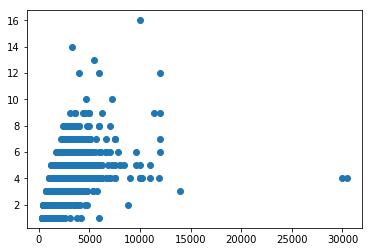

In [37]:
plt.scatter(df8.total_sqft,df8.bath)

In [38]:
df8[(df8.total_sqft/df8.bath) < (1000/3) ].head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
84,EPIP Zone,3 BHK,1499.0,5.0,2.0,102.0,3,6804.536358
209,Padmanabhanagar,4 Bedroom,1736.0,6.0,0.0,190.0,4,10944.700461
439,Kasavanhalli,3 Bedroom,1000.0,4.0,3.0,110.0,3,11000.000000
504,Shampura,1 BHK,375.0,2.0,0.0,26.0,1,6933.333333
603,Doddagubbi,3 Bedroom,1125.0,4.0,1.0,70.0,3,6222.222222


In [39]:
df9 = df8[~((df8.total_sqft/df8.bath) < (1000/3)) ]
df9.shape

(11962, 8)

<h2 style="color:purple">Location is a categorical variable. We need to do some dimensionality reduction here</h2>

In [40]:
df9.location = df9.location.apply(lambda x: x.strip())

In [41]:
df9.groupby('location')['location'].agg('count').sort_values(ascending=False)

location
Whitefield                              527
Sarjapur  Road                          385
Electronic City                         283
Kanakpura Road                          262
Thanisandra                             233
Yelahanka                               199
Uttarahalli                             178
Hebbal                                  173
Marathahalli                            170
Raja Rajeshwari Nagar                   167
Bannerghatta Road                       147
Hennur Road                             146
7th Phase JP Nagar                      143
Haralur Road                            139
Electronic City Phase II                122
Bellandur                                94
Rajaji Nagar                             93
Chandapura                               91
Electronics City Phase 1                 86
Hoodi                                    83
Begur Road                               81
Yeshwanthpur                             79
Harlur                 

In [42]:
top_locations = df9.groupby('location')['location'].agg('count').sort_values(ascending=False)[:1]
top_locations

location
Whitefield    527
Name: location, dtype: int64

In [43]:
# df10 = df9[df9.location.isin(top_locations.index)]
df10 = df9[df9.location=='Sarjapur  Road']

df10.shape

(385, 8)

In [44]:
df10.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
41,Sarjapur Road,3 BHK,1254.0,3.0,2.0,38.00,3,3030.303030
115,Sarjapur Road,3 Bedroom,2497.0,3.0,2.0,140.00,3,5606.728074
219,Sarjapur Road,3 BHK,1787.0,3.0,2.0,98.29,3,5500.279799
220,Sarjapur Road,3 BHK,1787.0,3.0,2.0,125.00,3,6994.963626
223,Sarjapur Road,2 BHK,984.0,2.0,1.0,44.28,2,4500.000000


In [45]:
dummies = pd.get_dummies(df10.location)
dummies.head()

,Sarjapur Road
41,1
115,1
219,1
220,1
223,1


In [46]:
df11 = df10.copy()
# df11 = pd.concat([df10,dummies],axis='columns')
df11.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
41,Sarjapur Road,3 BHK,1254.0,3.0,2.0,38.00,3,3030.303030
115,Sarjapur Road,3 Bedroom,2497.0,3.0,2.0,140.00,3,5606.728074
219,Sarjapur Road,3 BHK,1787.0,3.0,2.0,98.29,3,5500.279799
220,Sarjapur Road,3 BHK,1787.0,3.0,2.0,125.00,3,6994.963626
223,Sarjapur Road,2 BHK,984.0,2.0,1.0,44.28,2,4500.000000


In [47]:
df11.bhk.unique()

array([3, 2, 4, 1, 5], dtype=int64)

In [48]:
bhk2 = df11[df11.bhk==2]
bhk3 = df11[df11.bhk==3]

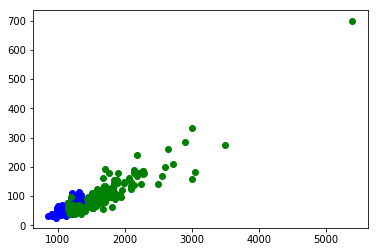

In [49]:
plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK')
plt.scatter(bhk3.total_sqft,bhk3.price,color='green',label='3 BHK')

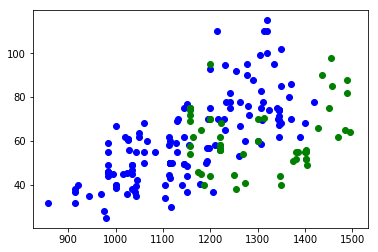

In [50]:
bhk2_less = bhk2[bhk2.total_sqft<1500]
bhk3_less = bhk3[bhk3.total_sqft<1500]
plt.scatter(bhk2_less.total_sqft,bhk2_less.price,color='blue',label='2 BHK')
plt.scatter(bhk3_less.total_sqft,bhk3_less.price,color='green',label='3 BHK')

In [51]:
df11[(df11.total_sqft>=1200)&(df11.total_sqft<=1300)].head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
41,Sarjapur Road,3 BHK,1254.0,3.0,2.0,38.00,3,3030.303030
598,Sarjapur Road,3 BHK,1249.0,3.0,2.0,44.71,3,3579.663731
653,Sarjapur Road,2 BHK,1210.0,2.0,2.0,58.00,2,4793.388430
881,Sarjapur Road,2 BHK,1278.0,2.0,2.0,95.00,2,7433.489828
1532,Sarjapur Road,2 BHK,1282.0,2.0,2.0,72.00,2,5616.224649


In [52]:
df11[df11.bhk==1]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1180,Sarjapur Road,1 BHK,710.0,1.0,1.0,27.000,1,3802.816901
1542,Sarjapur Road,1 BHK,615.0,1.0,0.0,17.835,1,2900.000000
3503,Sarjapur Road,1 BHK,685.0,1.0,1.0,40.000,1,5839.416058
3744,Sarjapur Road,1 BHK,835.0,1.0,1.0,46.950,1,5622.754491
4758,Sarjapur Road,1 BHK,715.0,1.0,2.0,29.000,1,4055.944056
6291,Sarjapur Road,1 BHK,950.0,1.0,0.0,39.900,1,4200.000000
6655,Sarjapur Road,1 BHK,539.0,1.0,1.0,45.000,1,8348.794063
9364,Sarjapur Road,1 BHK,534.0,1.0,1.0,19.650,1,3679.775281
9603,Sarjapur Road,1 BHK,702.0,1.0,1.0,52.000,1,7407.407407
10319,Sarjapur Road,1 BHK,691.0,1.0,1.0,31.100,1,4500.723589


In [53]:
np.std(df11[df11.bhk==2].price_per_sqft)

1257.8056966444667

**Remove data points outside one standard deviation, these are outliers skewing up our results hence they must be removed**

In [56]:
bhk_stats = {}
for key, subdf in df11.groupby('bhk'):
    bhk_stats[key] = {
        'mean': np.mean(subdf.price_per_sqft),
        'std': np.std(subdf.price_per_sqft)
    }

In [57]:
bhk_stats

{1: {'mean': 4994.694704414888, 'std': 1485.913025465236},
 2: {'mean': 5176.13699760796, 'std': 1257.8056966444667},
 3: {'mean': 6129.596504214384, 'std': 1749.568289510329},
 4: {'mean': 8682.64868934951, 'std': 3171.576836045659},
 5: {'mean': 7217.4561079001705, 'std': 1913.2374639679733}}

In [59]:
exclude_indices = np.array([])
for key,subdf in df11.groupby('bhk'):
    stats = bhk_stats.get(key-1)
    if stats:
        exclude_indices = np.append(exclude_indices, subdf[subdf.price_per_sqft<stats['mean']].index.values)

In [60]:
len(exclude_indices)

135

In [63]:
df12 = df11.drop(exclude_indices,axis='index')
df12.shape

(250, 8)

In [82]:
df12_2 = df12[df12.bhk==2]
df12_3 = df12[(df12.bhk==3) &(df12.total_sqft<1500)]

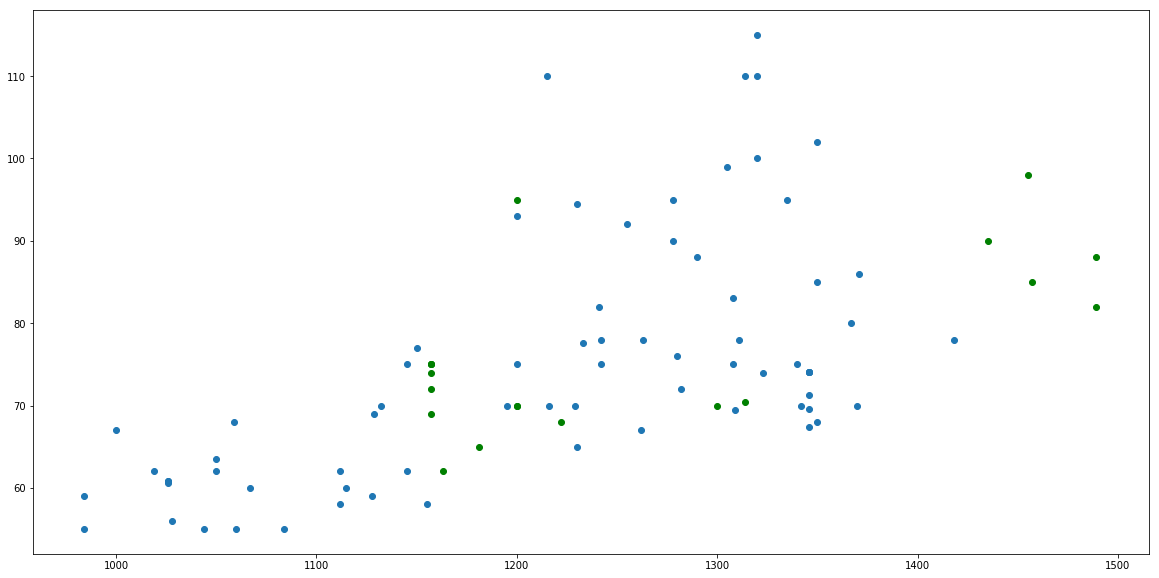

In [83]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.scatter(df12_2.total_sqft,df12_2.price)
plt.scatter(df12_3.total_sqft,df12_3.price,color='green')

In [65]:
df13 = df12.drop(['location','size','balcony','price_per_sqft'],axis='columns')
df13.head()

,total_sqft,bath,price,bhk
115,2497.0,3.0,140.00,3
219,1787.0,3.0,98.29,3
220,1787.0,3.0,125.00,3
331,1000.0,2.0,67.00,2
452,1346.0,2.0,74.03,2


<h2 style='color:purple'>Build a model now</h2>

In [66]:
X = df13.drop(['price'],axis='columns')
X.head()

,total_sqft,bath,bhk
115,2497.0,3.0,3
219,1787.0,3.0,3
220,1787.0,3.0,3
331,1000.0,2.0,2
452,1346.0,2.0,2


In [67]:
X.shape

(250, 3)

In [68]:
y = df13.price
y.head()

115    140.00
219     98.29
220    125.00
331     67.00
452     74.03
Name: price, dtype: float64

In [69]:
len(y)

250

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [73]:
len(X_train)

200

In [74]:
len(X_test)

50

In [77]:
X_test[:10]

,total_sqft,bath,bhk
12706,2089.0,3.0,3
1926,1846.0,3.0,3
2192,1929.0,4.0,3
8829,1157.0,2.0,3
11358,2500.0,4.0,4
115,2497.0,3.0,3
12809,1044.0,2.0,2
7277,2990.0,4.0,4
1834,1700.0,3.0,3
10756,3930.0,5.0,4


In [70]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)
model.coef_

array([  0.124247  , -11.9469152 ,  -0.06543201])

In [84]:
test_df = pd.DataFrame([
    {
    'total_sqft': 1000,
    'bath': 2,
    'bhk': 2
    },
    {
    'total_sqft': 1000,
    'bath': 3,
    'bhk': 3
    },    
])
model.predict(test_df)
# model.predict([
#     [1000,2,2],
#     [1000,3,3]
# ])

array([-143.10927377, -154.93194197])

In [86]:
test_df

,bath,bhk,total_sqft
0,2,2,1000
1,3,3,1000


In [85]:
model.predict(X_test[:10])

array([169.48301605, 139.29099529, 137.65658101,  65.63172818,
       208.53618543, 220.17579165,  51.6572493 , 269.41721495,
       121.15093344, 374.26247881])

In [329]:
loc = 'Whitefield'
loc_index = np.where(x_cols==loc)[0][0]
loc_index

3

In [330]:
x1 = np.zeros(len(x_cols))
x1

array([0., 0., 0., 0.])

In [331]:
x1[0] = 1000 # total sqft
x1[1] = 2 # bath
x1[2] = 2 # bhk
x1[loc_index] = 1 # set correct column for location

In [332]:
x2 = np.zeros(len(x_cols))
x2[0] = 1000
x2[1] = 3 # bath
x2[2] = 3 # bhk
x2[loc_index] = 1

In [333]:
model.predict([x1,x2])

array([39.7733933 , 44.25804634])

**Sarjapur Road location is having an issue**